In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
!cp /content/drive/'My Drive'/'Deep Learning'/StanceDataset.zip .
!unzip -q -o StanceDataset.zip -d data
!rm StanceDataset.zip
!unzip -uq "/content/drive/My Drive/Deep Learning/StanceDataset.zip" -d "/content/drive/My Drive/Deep Learning/data"

In [10]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import numpy as np
import pandas as pd

import tensorflow_datasets as tfds
import pathlib
import shutil
import tempfile

from  IPython import display
from matplotlib import pyplot as plt

In [11]:
stance_df = pd.read_csv("../content/drive/My Drive/Deep Learning/data/StanceDataset/train.csv", index_col = None, header = 0, 
                        engine = 'python')
stance_df.head(15)

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos
5,Hillary can not win. Here's hoping the Dems of...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
6,Respect FOR the law and respect BY the law Yes...,Hillary Clinton,NONE,2. The tweet does NOT expresses opinion about ...,pos
7,I don't want to be appointed to an Ambassador ...,Hillary Clinton,NONE,2. The tweet does NOT expresses opinion about ...,neg
8,#StopHillary2016 @HillaryClinton if there was ...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
9,@HillaryClinton End lawless #ClintonFoundation...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg


In [12]:
stance_df['Stance'] = stance_df['Stance'].replace("NONE", "NEITHER")

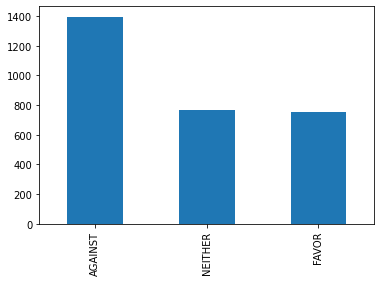

In [13]:
stance_df['Stance'].value_counts().plot(kind='bar')

In [23]:
import re

def process(text, tokeniser, stopwords=[]):
    """
    Perform the re-processing of tweets.  

    @param text: the text (tweet) to process
    @param tokeniser: tokeniser to use.
    @param stopwords: list of stopwords to use.
      
    @returns: list of (valid) tokens in text
    """
    
    regexDigit = re.compile("^\d+\s|\s\d+\s|\s\d+$")
    regexHttp = re.compile("^http")
    emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    
    text = text.lower()
    text = re.sub("@", '', text)
    text = re.sub("#", '', text)
    tokens = tokeniser.tokenize(text)
        
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit() and regexDigit.match(tok) == None and 
                           regexHttp.match(tok) == None and emoji_pattern.match(tok) == None ]

In [34]:
# use built-in nltk tweet tokenizer
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from collections import Counter

tweetTokenizer = nltk.tokenize.TweetTokenizer()
punct = list(string.punctuation)
stopwordList = stopwords.words('english') + punct +['.']

# this will store the list of tweets we read from timeline
for line in range(0, len(stance_df)):
        stance_df['Tokenized Tweets'][line] = process(text=stance_df['Tweet'][line], tokeniser=tweetTokenizer, stopwords=stopwordList)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
stance_df.head(15)

,Tweet,Target,Stance,Opinion Towards,Sentiment,Tokenized Tweets
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg,"[tedcruz, handovertheserver, wiped, clean, 30k..."
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos,"[hillary, best, choice, truly, want, continue,..."
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg,"[theview, think, country, ready, female, pres,..."
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg,"[gave, unhealthy, amount, hard-earned, money, ..."
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NEITHER,3. The tweet is not explicitly expressing opi...,pos,"[portiaaboulger, thank, adding, list]"
5,Hillary can not win. Here's hoping the Dems of...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg,"[hillary, win, here's, hoping, dems, offer, re..."
6,Respect FOR the law and respect BY the law Yes...,Hillary Clinton,NEITHER,2. The tweet does NOT expresses opinion about ...,pos,"[respect, law, respect, law, yes, needed, desp..."
7,I don't want to be appointed to an Ambassador ...,Hillary Clinton,NEITHER,2. The tweet does NOT expresses opinion about ...,neg,"[want, appointed, ambassador, post]"
8,#StopHillary2016 @HillaryClinton if there was ...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg,"[stophillary, hillaryclinton, woman, integrity..."
9,@HillaryClinton End lawless #ClintonFoundation...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg,"[hillaryclinton, end, lawless, clintonfoundati..."
